In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.core.frame import DataFrame
from random import shuffle
import seaborn as sns

In [2]:
total = pd.read_excel('../data/total_census_occupations.xlsx')

In [3]:
def categorize_white(percent):
    if percent < 67.2: return 'less than pop'
    elif percent == 67.2: return 'equal to pop'
    elif percent > 67.2: return 'more than pop'
    else: return np.nan

total['White Representation'] = total['White Percent'].apply(categorize_white)

def categorize_black(percent):
    if percent < 11: return 'less than pop'
    elif percent == 11: return 'equal to pop'
    elif percent > 11: return 'more than pop'
    else: return np.nan

total['Black Representation'] = total['Black Percent'].apply(categorize_black)

def categorize_asian(percent):
    if percent < 5.9: return 'less than pop'
    elif percent == 5.9: return 'equal to pop'
    elif percent > 5.9: return 'more than pop'
    else: return np.nan

total['Asian Representation'] = total['Asian Percent'].apply(categorize_asian)

def categorize_hispanic(percent):
    if percent < 15.8: return 'less than pop'
    elif percent == 15.8: return 'equal to pop'
    elif percent > 15.8: return 'more than pop'
    else: return np.nan

total['Hispanic Representation'] = total['Hispanic Percent'].apply(categorize_hispanic)

In [4]:
total.loc[total['White Representation']=='less than pop']

,Occupation,Total Estimate,Total MOE3,White Estimate,White MOE3,White Percent,White MOE3.1,Black Estimate,Black MOE3,Black Percent,...,Asian MOE3.1,Hispanic Estimate,Hispanic MOE3,Hispanic Percent,Hispanic MOE3.1,Type,White Representation,Black Representation,Asian Representation,Hispanic Representation
5,..Computer systems analysts,473135.0,5172.3,310130.0,3795.1,65.5,0.5,40245.0,1616.2,8.5,...,0.4,32075.0,1393.9,6.8,0.3,subfield,less than pop,less than pop,more than pop,less than pop
8,"..Software developers, applications and system...",1050915.0,9784.1,613055.0,6411.0,58.3,0.3,47520.0,1795.0,4.5,...,0.3,49565.0,1930.4,4.7,0.2,subfield,less than pop,less than pop,more than pop,less than pop
14,"..Computer occupations, all other",462620.0,4629.8,309595.0,4005.1,66.9,0.6,48540.0,1684.1,10.5,...,0.4,38425.0,1736.3,8.3,0.3,subfield,less than pop,less than pop,more than pop,less than pop
18,..Miscellaneous mathematical science occupatio...,45945.0,1637.4,30155.0,1197.9,65.6,1.6,3185.0,497.1,6.9,...,1.4,2700.0,376.5,5.9,0.8,subfield,less than pop,less than pop,more than pop,less than pop
26,..Computer hardware engineers,52265.0,1567.5,30625.0,1172.3,58.6,1.7,3505.0,469.8,6.7,...,1.5,3235.0,473.0,6.2,0.9,subfield,less than pop,less than pop,more than pop,less than pop
43,"..Medical scientists and life scientists, all ...",133205.0,2941.8,76770.0,2064.4,57.6,0.9,6745.0,596.7,5.1,...,1.0,7965.0,693.0,6.0,0.5,subfield,less than pop,less than pop,more than pop,less than pop
49,"..Physical scientists, all other",200220.0,3791.9,128895.0,2752.5,64.4,0.6,6790.0,589.3,3.4,...,0.6,10040.0,719.3,5.0,0.4,subfield,less than pop,less than pop,more than pop,less than pop
57,..Biological technicians,16855.0,975.6,11305.0,763.2,67.1,2.9,1405.0,250.3,8.3,...,1.8,2085.0,353.1,12.4,1.9,subfield,less than pop,less than pop,more than pop,less than pop


In [5]:
wrep_data = total.groupby('White Representation').size().reset_index().rename(columns={0:'n_wrep'})
display(wrep_data)

,White Representation,n_wrep
0,equal to pop,2
1,less than pop,8
2,more than pop,51


In [6]:
bartotal = total.loc[total['White Estimate']>=5636170.0]
bartotal

,Occupation,Total Estimate,Total MOE3,White Estimate,White MOE3,White Percent,White MOE3.1,Black Estimate,Black MOE3,Black Percent,...,Asian MOE3.1,Hispanic Estimate,Hispanic MOE3,Hispanic Percent,Hispanic MOE3.1,Type,White Representation,Black Representation,Asian Representation,Hispanic Representation
0,Civilian employed age 25 and over,125850932.0,110885.4,84585827.0,87601.7,67.2,<0.1,13908136.0,18828.1,11.0,...,<0.1,19918842.0,21368.8,15.8,<0.1,Total,equal to pop,equal to pop,equal to pop,equal to pop
1,Total STEM2,7980038.0,56752.8,5636170.0,36858.0,70.6,0.1,506349.0,6731.4,6.3,...,0.1,560030.0,9645.3,7.0,0.1,Total STEM,more than pop,less than pop,more than pop,less than pop


<AxesSubplot:>

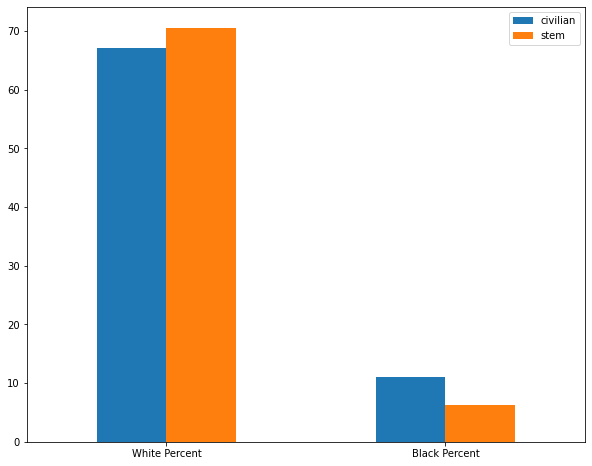

In [7]:
df = bartotal[['White Percent', 'Black Percent']].transpose()
df.columns = ['civilian', 'stem']
df.plot.bar(rot=0, figsize=(10,8))

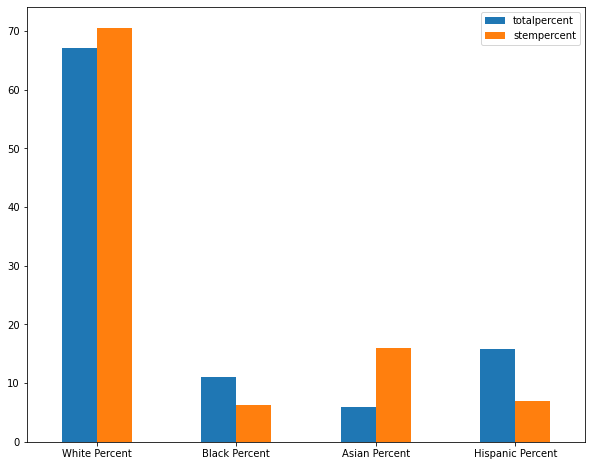

In [8]:
totalpercent = [67.2, 11.0, 5.9, 15.8]
stempercent = [70.6, 6.3, 16.0, 7.0]
index = ['White Percent', 'Black Percent', 'Asian Percent','Hispanic Percent']
df = pd.DataFrame({'totalpercent': totalpercent,'stempercent': stempercent}, index=index)
ax = df.plot.bar(rot=0, figsize=(10,8))

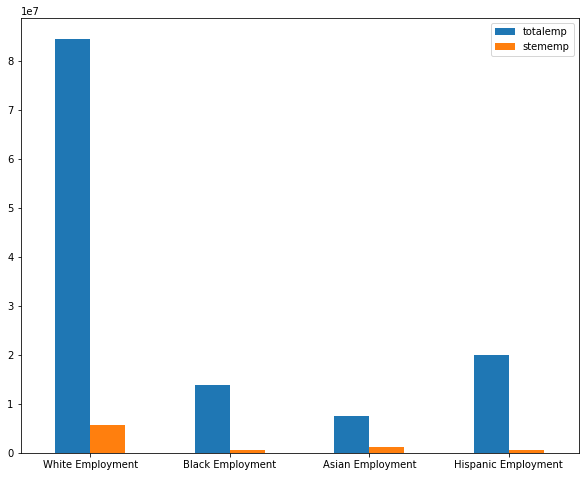

In [9]:
totalemp = [84585827.0, 13908136.0, 7438127.0, 19918842.0]
stememp = [5636170.0, 506349.0, 1277489.0, 560030.0]
index1 = ['White Employment', 'Black Employment', 'Asian Employment','Hispanic Employment']
df2 = pd.DataFrame({'totalemp': totalemp,'stememp': stememp}, index=index1)
ax2 = df2.plot.bar(rot=0, figsize=(10,8))

In [10]:
wltp = 0.0
wmtp = 0.0
bltp = 0.0
bmtp = 0.0
altp = 0.0
amtp = 0.0
hltp = 0.0
hmtp = 0.0

for i, row in total.iterrows():
    val = row['White Representation']
    typ = row['Type']
    if typ == 'subfield':
        if val == 'less than pop':
            wltp += row['White Estimate']
        if val == 'more than pop':
            wmtp += row['White Estimate']

for i, row in total.iterrows():
    val = row['Black Representation']
    typ = row['Type']
    if typ == 'subfield':
        if val == 'less than pop':
            bltp += row['Black Estimate']
        if val == 'more than pop':
            bmtp += row['Black Estimate']

for i, row in total.iterrows():
    val = row['Asian Representation']
    typ = row['Type']
    if typ == 'subfield':
        if val == 'less than pop':
            altp += row['Asian Estimate']
        if val == 'more than pop':
            amtp += row['Asian Estimate']

for i, row in total.iterrows():
    val = row['Hispanic Representation']
    typ = row['Type']
    if typ == 'subfield':
        if val == 'less than pop':
            hltp += row['Hispanic Estimate']
        if val == 'more than pop':
            hmtp += row['Hispanic Estimate']


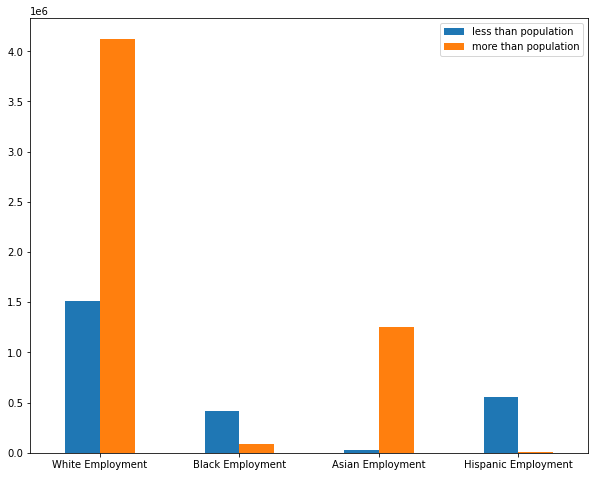

In [11]:
ltp = [wltp, bltp, altp, hltp]
mtp = [wmtp, bmtp, amtp, hmtp]
index2 = ['White Employment', 'Black Employment', 'Asian Employment','Hispanic Employment']
df3 = pd.DataFrame({'less than population': ltp,'more than population': mtp}, index=index2)
ax3 = df3.plot.bar(rot=0, figsize=(10,8))

In [15]:
df3

,less than population,more than population
White Employment,1510530.0,4125665.0
Black Employment,417710.0,88645.0
Asian Employment,26020.0,1251490.0
Hispanic Employment,555170.0,4845.0


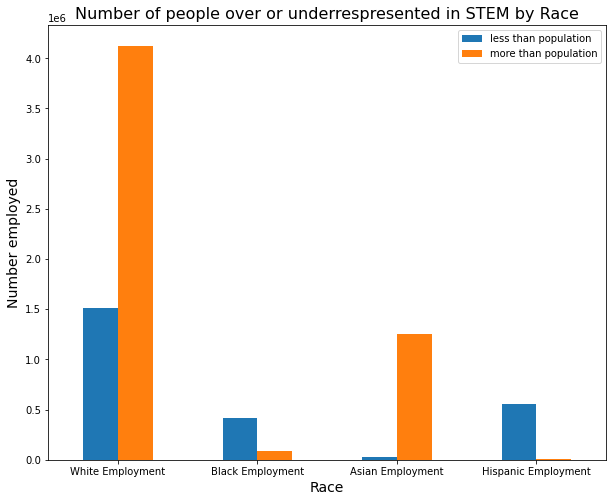

In [13]:
ax = df3.plot.bar(rot=0, figsize=(10,8))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number employed', fontsize=14)
ax.set_xlabel('Race', fontsize=14)
ax.set_title('Number of people over or underrespresented in STEM by Race', fontsize=16)
ax.legend()


# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()

plt.show()

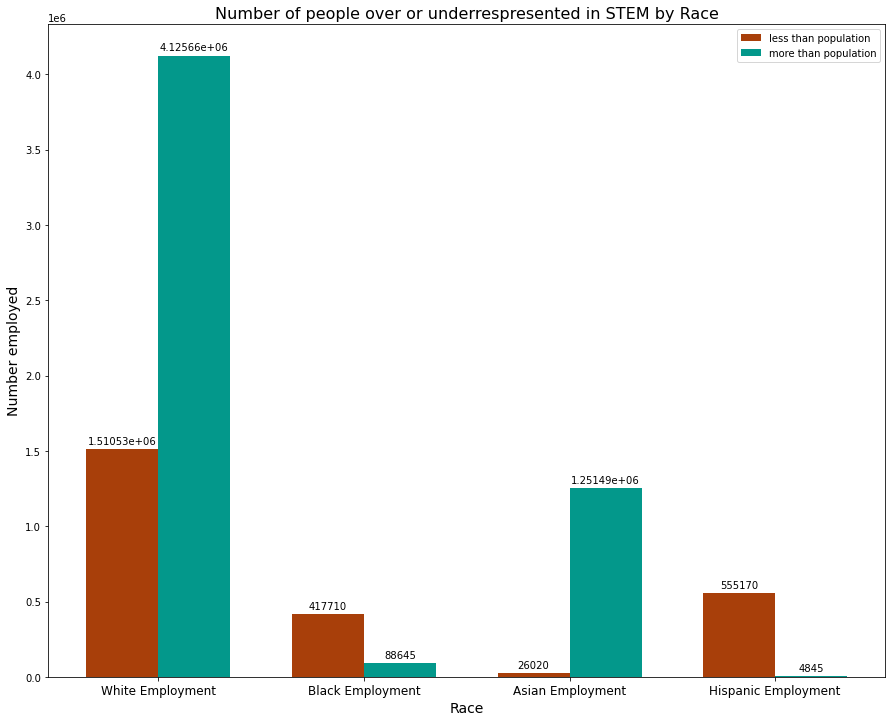

In [24]:
labels = df3.index

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x - width*0.5, df3['less than population'], width, label='less than population', color='#a83f0a')
rects1 = ax.bar(x+width*0.5, df3['more than population'], width, label='more than population', color='#03988b')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number employed', fontsize=14)
ax.set_xlabel('Race', fontsize=14)
ax.set_title('Number of people over or underrespresented in STEM by Race', fontsize=16)
ax.set_xticks(x, labels, ha='center', fontsize=12)
ax.legend()
# ax.set_ylim(0,105)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

# fig.tight_layout()
fig.set_size_inches(15, 12)

plt.xticks(rotation=0)

plt.show()